# The Zillow Data Science Team wants to predict the values of single unit properties that the tax district assesses using the property data from those with a transaction during the "hot months" (in terms of real estate demand) of May-August, 2017.

---

# Planning
- Agile Kanban: 
    - https://trello.com/b/IdNd8GPA/regression-project
<br /> 

- The Zillow Data Science team would like to know:
    - **What states and counties are these single unit properties located in?**
    - **What is the distribution of tax rates for each county of the single unit properties?**

<br />

- Project Objectives:
    - See if only the square feet of the home, number of bedrooms and number of bathrooms predict home values using the tax assessed value.
    - Documenting process and analysis throughout the data science pipeline.
    - Constructing a regression model that predicts home values for Zillow. 

<br /> 

**- Hypothesis:**
- Is there a correlation between in taxvaluedollarcnt (tax_value) for homes based on which county it is in? 
- Is there a correlation between square feet of the home and its taxvaluedollarcnt (tax_value)?

---

# Acquire

In [1]:
#Imports for the Final Notebook
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#acquires and prepares data
import acquire
import prep
import explore

#split and scale functions
from sklearn.model_selection import train_test_split
from prep import Min_Max_Scaler

#statistical testing
from scipy import stats

# evaluating/modeling methods
import math
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

---

In [2]:
df = prep.get_zillow_data()

In [3]:
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,None,NaN,2.0,...,289445.0,2016.0,213516.0,3490.16,None,NaN,6.059001e+13,625,-0.061973,2017-08-04
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,None,NaN,6.037220e+13,1018,0.017785,2017-07-21
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,None,9.0,2.0,...,810694.0,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,1772,-0.146056,2017-06-30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38622 entries, 0 to 38621
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      38622 non-null  int64  
 1   id                            38622 non-null  int64  
 2   airconditioningtypeid         12224 non-null  float64
 3   architecturalstyletypeid      101 non-null    float64
 4   basementsqft                  27 non-null     float64
 5   bathroomcnt                   38622 non-null  float64
 6   bedroomcnt                    38622 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         23706 non-null  float64
 9   calculatedbathnbr             38463 non-null  float64
 10  decktypeid                    333 non-null    float64
 11  finishedfloor1squarefeet      3339 non-null   float64
 12  calculatedfinishedsquarefeet  38509 non-null  float64
 13  f

In [5]:
#There is so much to look at, need to narrow this down
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,38622.0,1.310495e+07,3.700741e+06,1.071186e+07,1.154805e+07,1.260418e+07,1.429905e+07,1.676878e+08
id,38622.0,1.500394e+06,8.591808e+05,3.490000e+02,7.599932e+05,1.507182e+06,2.242966e+06,2.982274e+06
airconditioningtypeid,12224.0,1.900196e+00,3.112632e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,101.0,7.564356e+00,3.232386e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,27.0,6.397037e+02,4.459779e+02,1.000000e+02,3.490000e+02,6.040000e+02,7.430000e+02,1.969000e+03
bathroomcnt,38622.0,2.273743e+00,9.505879e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.100000e+01
bedroomcnt,38622.0,3.010512e+00,1.029506e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.200000e+01
buildingqualitytypeid,23706.0,6.610394e+00,1.694360e+00,1.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,38463.0,2.282739e+00,9.417021e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.100000e+01
decktypeid,333.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


In [6]:
df.shape

(38622, 62)

In [7]:
#Showing the nulls within the inital dataset
df.isnull().sum()

parcelid                            0
id                                  0
airconditioningtypeid           26398
architecturalstyletypeid        38521
basementsqft                    38595
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             38622
buildingqualitytypeid           14916
calculatedbathnbr                 159
decktypeid                      38289
finishedfloor1squarefeet        35283
calculatedfinishedsquarefeet      113
finishedsquarefeet12              228
finishedsquarefeet13            38591
finishedsquarefeet15            38618
finishedsquarefeet50            35283
finishedsquarefeet6             38542
fips                                0
fireplacecnt                    33969
fullbathcnt                       159
garagecarcnt                    24703
garagetotalsqft                 24703
hashottuborspa                  37733
heatingorsystemtypeid           14009
latitude                            0
longitude   

In [8]:
# noting the features that we would like to focus on
sum_features = df[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]
sum_features.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,38622.0,3.010512,1.029506,0.0,2.0,3.0,4.0,12.0
bathroomcnt,38622.0,2.273743,0.950588,0.0,2.0,2.0,3.0,11.0
calculatedfinishedsquarefeet,38509.0,1762.746709,928.300281,240.0,1174.0,1525.0,2082.0,17245.0
taxvaluedollarcnt,38621.0,496577.879651,632690.906146,1000.0,209051.0,363516.0,577804.0,23858374.0


Text(0.5, 1.0, 'Distribution of bedrooms')

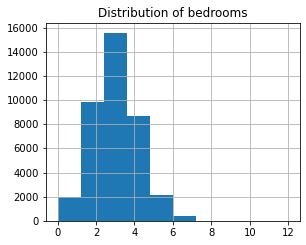

In [9]:
# use subplots to view distribution of numeric columns
plt.figure(figsize=(10, 8))

plt.subplot(222),
df.bedroomcnt.hist()
plt.gca().set_title('Distribution of bedrooms')

Text(0.5, 1.0, 'Distribution of bathrooms')

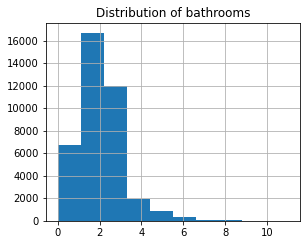

In [10]:
plt.figure(figsize=(10, 8))
plt.subplot(221)
df.bathroomcnt.hist()
plt.gca().set_title('Distribution of bathrooms')

Text(0.5, 1.0, 'Distribution of square feet')

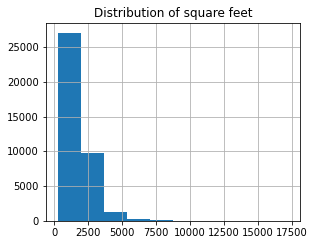

In [11]:
plt.figure(figsize=(10, 8))
plt.subplot(224)
df.calculatedfinishedsquarefeet.hist()
plt.gca().set_title('Distribution of square feet')

Text(0.5, 1.0, 'Distribution of tax value')

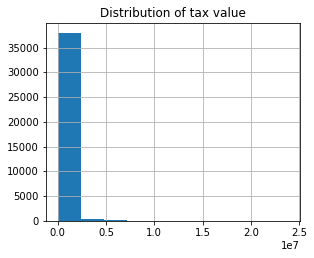

In [12]:
plt.figure(figsize=(10, 8))
plt.subplot(223)
df.taxvaluedollarcnt.hist() 
plt.gca().set_title('Distribution of tax value')

**Takeaways**
- So. Many. Nulls. 
- Need to remove the nulls within the data
- There are many columns (62 to be exact as shown in shape)
    - Not sure if we need all these columns, need to remove some for data digestion
- Need to clean data

-----

# Prepare

- Used the following columns for Prepare with reasoning below: 
    - bedroomcnt 
        - Reasoning: same number of 38622 non-null with bathroomcnt
    - bathroomcnt
        - Reasoning: same number of 38622 non-null with bedroomcnt
    - calculatedfinishedsquarefeet
         - Reasoning: around same number of 38509 non-null's as bedroomcnt and bathroomcnt
    - taxvaluedollarcnt 
        - Reasoning: project cirriculm noted to use this exact column
    - taxamount (tax value, taxes, tax rate)
        - Reasoning: around same number as bedroomcnt, bathroomcnt and calculatedfinishedsquarefeet with 38621 non-null's and way to figure out the tax amount   
        
<br/>  

- Outliers / identified erroneous data: 
    - Reasoning: Any columns not within the prepare file have outliers or are erroneous data.

In [13]:
prep_zillow = prep.clean_zillow(df)
prep_zillow.head()

,parcelid,county_code,bedrooms,bathrooms,square_feet,tax_value,taxes,tax_rate
0,14634203,6059.0,3,2.0,1125,289445,3490.16,1.21
1,11721753,6037.0,3,2.0,1316,205123,2627.48,1.28
2,11289917,6037.0,3,2.0,1458,136104,2319.90,1.70
3,11637029,6037.0,3,2.0,1766,810694,9407.01,1.16
4,11705026,6037.0,2,1.0,1421,35606,543.69,1.53


In [14]:
prep_zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34858 entries, 0 to 38621
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcelid     34858 non-null  int64  
 1   county_code  34858 non-null  float64
 2   bedrooms     34858 non-null  int64  
 3   bathrooms    34858 non-null  float64
 4   square_feet  34858 non-null  int64  
 5   tax_value    34858 non-null  int64  
 6   taxes        34858 non-null  float64
 7   tax_rate     34858 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 2.4 MB


In [15]:
# checking the nulls for the cleaned data: 
prep_zillow.isnull().sum()

parcelid       0
county_code    0
bedrooms       0
bathrooms      0
square_feet    0
tax_value      0
taxes          0
tax_rate       0
dtype: int64

In [16]:
prep_zillow.shape

(34858, 8)

In [17]:
# TARGET
# Droping the taxes and tax rate as the model will predict tax value to predict the tax amount (the whole reason why we are doing this model)
df = prep_zillow.drop(columns=['taxes', 'tax_rate'])

In [18]:
# checking to make sure the original dataframe is updated: 
df.head()

,parcelid,county_code,bedrooms,bathrooms,square_feet,tax_value
0,14634203,6059.0,3,2.0,1125,289445
1,11721753,6037.0,3,2.0,1316,205123
2,11289917,6037.0,3,2.0,1458,136104
3,11637029,6037.0,3,2.0,1766,810694
4,11705026,6037.0,2,1.0,1421,35606


In [19]:
df.columns

Index(['parcelid', 'county_code', 'bedrooms', 'bathrooms', 'square_feet',
       'tax_value'],
      dtype='object')

In [20]:
# split the data
train, validate, test = prep.split(df)

In [21]:
train.columns

Index(['parcelid', 'county_code', 'bedrooms', 'bathrooms', 'square_feet',
       'tax_value'],
      dtype='object')

In [22]:
# checking the shape of the split datasets: 
train.shape, validate.shape, test.shape

((19520, 6), (8366, 6), (6972, 6))

In [23]:
train.head()

,parcelid,county_code,bedrooms,bathrooms,square_feet,tax_value
13699,14698095,6059.0,4,3.5,2680,735936
23278,10924173,6037.0,3,2.0,1778,451786
14085,13880974,6059.0,3,1.0,1118,388289
17942,11788895,6037.0,2,2.0,1348,456387
35024,10804503,6037.0,2,3.0,2044,437299


In [24]:
# X and Y 
X_train = train.drop(columns=['tax_value'])
y_train = train.tax_value

X_validate = validate.drop(columns=['tax_value'])
y_validate = validate.tax_value

X_test = test.drop(columns=['tax_value'])
y_test = test.tax_value

In [25]:
#Min_Max_Scaler
X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)

In [26]:
# Look at X_train
X_train_scaled.head()

,parcelid,county_code,bedrooms,bathrooms,square_feet
13699,0.025402,0.297297,0.444444,0.466667,0.761786
23278,0.001353,0.000000,0.333333,0.266667,0.480175
14085,0.020195,0.297297,0.333333,0.133333,0.274118
17942,0.006863,0.000000,0.222222,0.266667,0.345926
35024,0.000590,0.000000,0.222222,0.400000,0.563222


**Takeaways**
- Data is cleaned 
- Data is split into train, validate and test
- Data is scaled

**For Explore:**
- Target: 
    - tax_value
- Variables: 
    - Categorical variables: 
        - bedrooms
        - bathrooms
    - Continuous variables: 
        - square_feet
    - Remaining variables: 
        - parcelid (unique identifyer)

# Explore

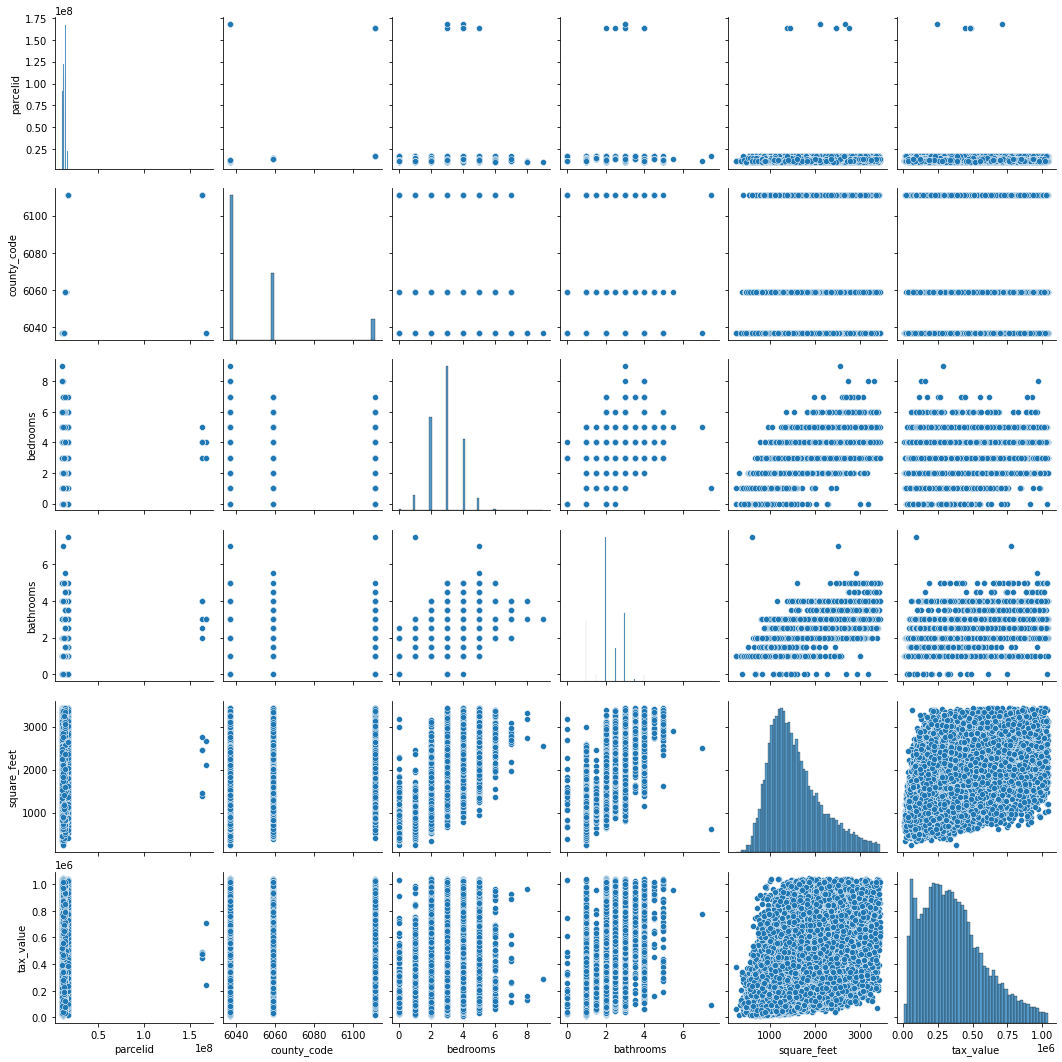

In [27]:
# pairplot to look at potential correlations
sns.pairplot(train)

**Pairplot Findings**
- square_feet and tax_value correlation
- square_feet and bathroom corrrelation
- outliers in parcel id make sense due to unique identifyer

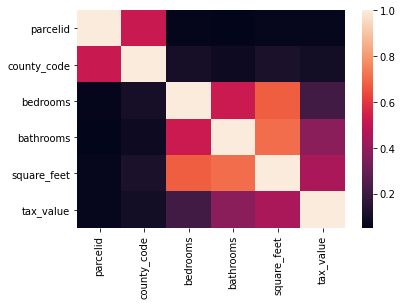

In [28]:
# heatmap to note correlations: 
sns.heatmap(train.corr())
plt.show()

**Heatmap Findings**
- parcelid doesn't show us anything due to it is a unique identifyer
- correlation between tax_value and square_feet

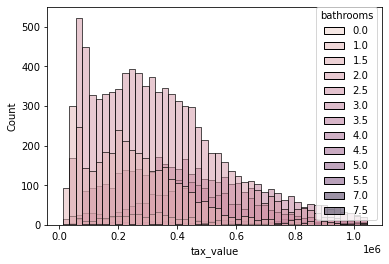

In [29]:
sns.histplot(data=train, x="tax_value", hue="bathrooms")
plt.show()

**Histplot Findings**
- As the number of bathrooms increase, the tax_value increases

In [30]:
import explore

In [31]:
train.columns

Index(['parcelid', 'county_code', 'bedrooms', 'bathrooms', 'square_feet',
       'tax_value'],
      dtype='object')

In [32]:
cat_vars = 'bedrooms', 'bathrooms', 'county_code'

In [33]:
quant_vars = 'square_feet'

**Univariate**

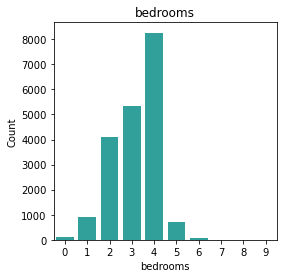

   bedrooms  Count  Percent
3         4   8260    42.32
2         3   5356    27.44
4         2   4109    21.05
1         1    910     4.66
5         5    701     3.59
0         0     96     0.49
6         6     73     0.37
7         7     11     0.06
8         8      3     0.02
9         9      1     0.01
_________________________________________________________________


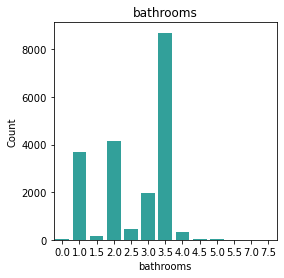

     bathrooms  Count  Percent
2.0        3.5   8693    44.53
3.0        2.0   4136    21.19
1.0        1.0   3683    18.87
2.5        3.0   1982    10.15
1.5        2.5    439     2.25
4.0        4.0    347     1.78
3.5        1.5    148     0.76
5.0        5.0     40     0.20
4.5        0.0     25     0.13
0.0        4.5     24     0.12
5.5        7.0      1     0.01
7.0        5.5      1     0.01
7.5        7.5      1     0.01
_________________________________________________________________


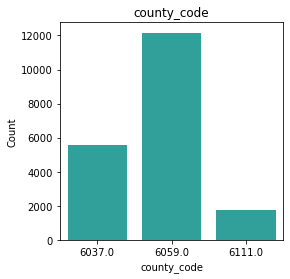

        county_code  Count  Percent
6037.0       6059.0  12158    62.28
6059.0       6037.0   5587    28.62
6111.0       6111.0   1775     9.09
_________________________________________________________________


In [34]:
explore.explore_univariate(train, cat_vars, quant_vars)

**bivariate**

In [35]:
target = 'tax_value'

bedrooms 
_____________________

            chi2       p-value  degrees of freedom
0  146967.489012  2.610296e-66              137763

observed:
 tax_value  10504  13199  14439  15433  16084  16305  16514  16722  16723  \
bedrooms                                                                   
0              0      0      0      0      0      0      0      0      0   
1              0      0      0      0      0      0      1      0      0   
2              1      0      1      1      1      0      0      0      1   
3              0      0      0      0      0      1      0      1      0   
4              0      1      0      0      0      0      0      0      0   
5              0      0      0      0      0      0      0      0      0   
6              0      0      0      0      0      0      0      0      0   
7              0      0      0      0      0      0      0      0      0   
8              0      0      0      0      0      0      0      0      0   
9              0 

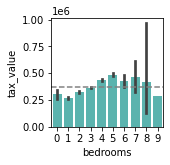


_____________________

bathrooms 
_____________________

            chi2        p-value  degrees of freedom
0  202715.011674  5.606875e-203              183684

observed:
 tax_value  10504  13199  14439  15433  16084  16305  16514  16722  16723  \
bathrooms                                                                  
0.0            0      0      0      0      0      0      0      0      0   
1.0            1      1      1      1      1      1      1      1      1   
1.5            0      0      0      0      0      0      0      0      0   
2.0            0      0      0      0      0      0      0      0      0   
2.5            0      0      0      0      0      0      0      0      0   
3.0            0      0      0      0      0      0      0      0      0   
3.5            0      0      0      0      0      0      0      0      0   
4.0            0      0      0      0      0      0      0      0      0   
4.5            0      0      0      0      0      0      0      0 

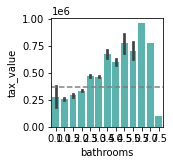


_____________________

county_code 
_____________________

           chi2       p-value  degrees of freedom
0  32627.080751  8.165844e-16               30614

observed:
 tax_value    10504  13199  14439  15433  16084  16305  16514  16722  16723  \
county_code                                                                  
6037.0           1      1      1      0      1      1      1      1      1   
6059.0           0      0      0      0      0      0      0      0      0   
6111.0           0      0      0      1      0      0      0      0      0   
All              1      1      1      1      1      1      1      1      1   

tax_value    17032  ...  1038000  1038960  1039456  1039814  1039819  1040630  \
county_code         ...                                                         
6037.0           1  ...        1        1        1        0        0        1   
6059.0           0  ...        0        0        0        0        1        0   
6111.0           0  ...        0   

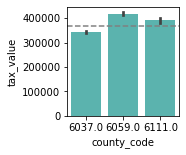


_____________________



In [36]:
explore.explore_bivariate(train, target, cat_vars)

**Statistical Tests**
- square_feet & county_code
    - Correlation Test
    - T-Test

In [37]:
#Tax Value x Square Feet Correlation Test
null_hypothesis = "There is no correlation correlation between square feet of the home and its taxvaluedollarcnt (tax_value)."
alternative_hypothesis = "There is a correlation correlation between square feet of the home and its taxvaluedollarcnt (tax_value)."
confidence_level = .95
alpha = 1 - confidence_level

corr, p = stats.pearsonr(train.square_feet, train.tax_value)

if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis:", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

We reject the null hypothesis.
We can move forward with the alternative hypothesis: There is a correlation correlation between square feet of the home and its taxvaluedollarcnt (tax_value).


In [38]:
#t-test on entire train set for square feet
t, p = stats.ttest_ind(train.tax_value,train.square_feet, equal_var=False)

In [39]:
print('t=',t)
print('p=',p)
print('alpha=',alpha)

t= 227.88074069804406
p= 0.0
alpha= 0.050000000000000044


In [40]:
p <alpha

True

In [41]:
#Tax Value x County Test
null_hypothesis = "There is no correlation between in taxvaluedollarcnt (tax_value) for homes based on which county it is in."
alternative_hypothesis = "There is a correlation between in taxvaluedollarcnt (tax_value) for homes based on which county it is in."
confidence_level = .95
alpha = 1 - confidence_level

corr, p = stats.pearsonr(train.county_code, train.tax_value)

if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis:", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

We reject the null hypothesis.
We can move forward with the alternative hypothesis: There is a correlation between in taxvaluedollarcnt (tax_value) for homes based on which county it is in.


In [42]:
#t-test on entire train set for county code
t, p = stats.ttest_ind(train.tax_value,train.county_code, equal_var=False)

In [43]:
t, p, alpha
print('t=',t)
print('p=',p)
print('alpha=',alpha)

t= 225.09975738944698
p= 0.0
alpha= 0.050000000000000044


In [44]:
p <alpha

True

**Explore Takeaways**
- Run at least 1 t-test and 1 correlation test 
    - Tax Value x Square Feet Tests:
        - T-tests:
            - t= 227.88074069804406
            - p= 0.0
            - alpha= 0.050000000000000044
            - p<alpha = TRUE
            
        - Correlation test: 
            - We reject the null hypothesis.
            - We can move forward with the alternative hypothesis: There is a correlation between in taxvaluedollarcnt (tax_value) for homes based on which county it is in.
    
    - Tax Value x County Test
         - T-tests:
            - t= 225.09975738944698
            - p= 0.0
            - alpha= 0.050000000000000044
            - p<alpha = TRUE
              
        - Correlation test: 
            - We reject the null hypothesis.
            - We can move forward with the alternative hypothesis: There is a correlation correlation between square feet of the home and its taxvaluedollarcnt (tax_value).

- Visualize all combinations of variables in some way(s).
    - See above in univariate and bivariate sections

___

# Modeling

In [45]:
# X_train_scaled dataframe
X_train_scaled.head()

,parcelid,county_code,bedrooms,bathrooms,square_feet
13699,0.025402,0.297297,0.444444,0.466667,0.761786
23278,0.001353,0.000000,0.333333,0.266667,0.480175
14085,0.020195,0.297297,0.333333,0.133333,0.274118
17942,0.006863,0.000000,0.222222,0.266667,0.345926
35024,0.000590,0.000000,0.222222,0.400000,0.563222


In [46]:
# Baseline
# Need to have y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [47]:
# Predict tax_value_pred_mean

#predicted mean will be the mean of tax_value column
tax_value_pred_mean = y_train['tax_value'].mean()
#new column created
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

In [48]:
y_train.head()

,tax_value,tax_value_pred_mean
13699,735936,368438.358709
23278,451786,368438.358709
14085,388289,368438.358709
17942,456387,368438.358709
35024,437299,368438.358709


In [49]:
# RMSE of tax_value_pred_mean

#root mean squared error of the predicted mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  224919.94 
Validate/Out-of-Sample:  223850.27


In [50]:
#create a dataframe to make data easier to visualize/understand
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline',
    'rmse_train': rmse_train,
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_mean)}])

metric_df
# baseline

,model,rmse_train,rmse_validate,r^2_validate
0,mean_baseline,224919.940632,223850.268185,0.0


In [51]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

#Predict mean of tax_value
tax_value_pred_mean = y_train.tax_value.mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

#Compute tax_value_pred_median
tax_value_pred_median = y_train.tax_value.median()
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median

In [52]:
import model

In [53]:
#Use the mean to evaluate baseline model
model.evaluation_metrics_mean(y_train.tax_value)

{'sse': 987496883628750.2,
 'mse': 50588979694.09581,
 'rmse': 224919.94063242993}

In [54]:
# before drop of target variable 
train.columns

Index(['parcelid', 'county_code', 'bedrooms', 'bathrooms', 'square_feet',
       'tax_value'],
      dtype='object')

In [55]:
# dropping target variable 'tax_value' from the train data set
train = train.drop(columns=['tax_value'])

In [56]:
# the target variable 'tax_value' is no longer within the train columns
train.columns

Index(['parcelid', 'county_code', 'bedrooms', 'bathrooms', 'square_feet'], dtype='object')

In [57]:
# need to convert floats to into int
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19520 entries, 13699 to 29467
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcelid     19520 non-null  int64  
 1   county_code  19520 non-null  float64
 2   bedrooms     19520 non-null  int64  
 3   bathrooms    19520 non-null  float64
 4   square_feet  19520 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.5 MB


In [58]:
type(train)

pandas.core.frame.DataFrame

In [59]:
# need to convert floats to into int
train['county_code'] = train['county_code'].astype(int)
train['bathrooms'] = train['bathrooms'].astype(int)

In [60]:
# now everything in train dataframe is a int
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19520 entries, 13699 to 29467
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   parcelid     19520 non-null  int64
 1   county_code  19520 non-null  int64
 2   bedrooms     19520 non-null  int64
 3   bathrooms    19520 non-null  int64
 4   square_feet  19520 non-null  int64
dtypes: int64(5)
memory usage: 1.5 MB


In [61]:
train_features =  'county_code', 'bedrooms', 'bathrooms', 'square_feet'

In [62]:
type('county_code')

str

In [63]:
y_train.shape

(19520, 3)

In [64]:
y_train.columns

Index(['tax_value', 'tax_value_pred_mean', 'tax_value_pred_median'], dtype='object')

**Tweedie Regressor Model**

In [65]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)


# fit the model to our training data. We must specify the column in y_train, 
# convert to a dataframe from a series 
glm.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm) ** (1/2)

# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  197709.1975278537 
Validation/Out-of-Sample:  198526.69296195515


**OLS Model**

In [66]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# convert to a dataframe from a series 
lm.fit(X_train_scaled, y_train.tax_value)


# predict train
y_train['tax_value_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm) ** (1/2)


# predict validate
y_validate['tax_value_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  197093.32337567734 
Validation/Out-of-Sample:  197592.03382367056


**Polynomial Regression**

In [67]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 =  pf.transform(X_test_scaled)


## LinearRegression ##
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# convert to a dataframe from a series 
lm2.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2) ** (1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  197093.32337567734 
Validation/Out-of-Sample:  39042611830.57457


**Takeaways**
- 

- Tweedie Regressor Model performed the best, but a bit too well, looks like an overfit situation
- OLS overall fit well, performing worse than Tweedie - but not overfit which makes the OLS model better than Tweedie
- Polynomial Regression performed the worse 

**- Taking the OLS model to work with the test data**

# Model Findings

In [68]:
#out of sample evaluation
y_test = pd.DataFrame(y_test)

# predict on test
y_test['tax_value_pred_lm'] = lm.predict(X_test_scaled)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_lm) ** (1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  198768.86256560206


# County Tax Rates

In [69]:
# shows all unique county numbers within df
df.county_code.unique()

array([6059., 6037., 6111.])

In [70]:
#number of homes per county
df['county_code'].value_counts()

6037.0    21768
6059.0     9930
6111.0     3160
Name: county_code, dtype: int64

In [71]:
final_df = prep.get_zillow_data()

In [72]:
final_df = prep.clean_zillow(final_df)

In [73]:
final_df.head()

,parcelid,county_code,bedrooms,bathrooms,square_feet,tax_value,taxes,tax_rate
0,14634203,6059.0,3,2.0,1125,289445,3490.16,1.21
1,11721753,6037.0,3,2.0,1316,205123,2627.48,1.28
2,11289917,6037.0,3,2.0,1458,136104,2319.90,1.70
3,11637029,6037.0,3,2.0,1766,810694,9407.01,1.16
4,11705026,6037.0,2,1.0,1421,35606,543.69,1.53


In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34858 entries, 0 to 38621
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcelid     34858 non-null  int64  
 1   county_code  34858 non-null  float64
 2   bedrooms     34858 non-null  int64  
 3   bathrooms    34858 non-null  float64
 4   square_feet  34858 non-null  int64  
 5   tax_value    34858 non-null  int64  
 6   taxes        34858 non-null  float64
 7   tax_rate     34858 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 2.4 MB


In [75]:
#turn county code into a string
final_df['county_code'] = final_df['county_code'].astype(str)

#if county code has a 6 as the first number, create column called state and add california
final_df.loc[final_df['county_code'].str[0] == '6', 'state'] = 'California'

#if county code contrains 111, create column called county and add ventura
final_df.loc[final_df['county_code'].str.contains('111'), 'county'] = 'Ventura'

#if county code contrains 037, create column called county and add los angeles
final_df.loc[final_df['county_code'].str.contains('037'), 'county'] = 'Los Angeles'

#if county code contrains 059, create column called county and add orange
final_df.loc[final_df['county_code'].str.contains('059'), 'county'] = 'Orange'

#change dtype back to float
final_df['county_code'] = final_df['county_code'].astype(float)

In [76]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34858 entries, 0 to 38621
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcelid     34858 non-null  int64  
 1   county_code  34858 non-null  float64
 2   bedrooms     34858 non-null  int64  
 3   bathrooms    34858 non-null  float64
 4   square_feet  34858 non-null  int64  
 5   tax_value    34858 non-null  int64  
 6   taxes        34858 non-null  float64
 7   tax_rate     34858 non-null  float64
 8   state        34858 non-null  object 
 9   county       34858 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 2.9+ MB


In [77]:
# drop values so we can convert to strings
final_df = final_df.drop(columns=['bedrooms','bathrooms','square_feet', 'tax_value', 'taxes'])

In [78]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34858 entries, 0 to 38621
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcelid     34858 non-null  int64  
 1   county_code  34858 non-null  float64
 2   tax_rate     34858 non-null  float64
 3   state        34858 non-null  object 
 4   county       34858 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ MB


In [79]:
df_rates_county = final_df[['parcelid', 'county_code','county', 'state', 'tax_rate']]
final_df.head()

,parcelid,county_code,tax_rate,state,county
0,14634203,6059.0,1.21,California,Orange
1,11721753,6037.0,1.28,California,Los Angeles
2,11289917,6037.0,1.70,California,Los Angeles
3,11637029,6037.0,1.16,California,Los Angeles
4,11705026,6037.0,1.53,California,Los Angeles


In [80]:
df_rates_county.to_csv('rates_and_county.csv')

In [89]:
df_rates_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34858 entries, 0 to 38621
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcelid     34858 non-null  int64  
 1   county_code  34858 non-null  float64
 2   county       34858 non-null  object 
 3   state        34858 non-null  object 
 4   tax_rate     34858 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ MB


In [81]:
# average tax rate per county
average_tax_rate = final_df.groupby('county_code')['tax_rate'].mean()
average_tax_rate

county_code
6037.0    1.387595
6059.0    1.210876
6111.0    1.193272
Name: tax_rate, dtype: float64

In [82]:
average_tax_rate.to_csv('average_tax_rate_by_county.csv')

In [83]:
average_tax_rate_final = final_df.groupby('county')['tax_rate'].mean()
average_tax_rate_final

county
Los Angeles    1.387595
Orange         1.210876
Ventura        1.193272
Name: tax_rate, dtype: float64

- fibs link from unique fibs: 
    - https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt
- 6037
    - Los Angeles County
- 6059
    - Orange County
- 6111
    - Ventura County

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34858 entries, 0 to 38621
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcelid     34858 non-null  int64  
 1   county_code  34858 non-null  float64
 2   bedrooms     34858 non-null  int64  
 3   bathrooms    34858 non-null  float64
 4   square_feet  34858 non-null  int64  
 5   tax_value    34858 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.9 MB


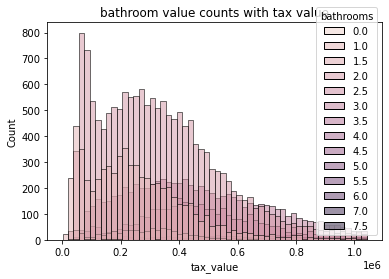

In [85]:
sns.histplot(df, x="tax_value", hue="bathrooms").set_title('bathroom value counts with tax value')
plt.show()

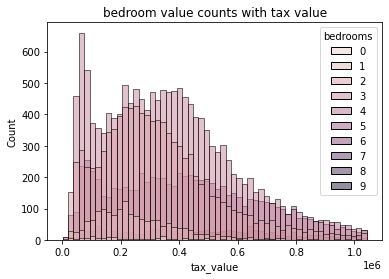

In [86]:
sns.histplot(df, x="tax_value", hue="bedrooms").set_title('bedroom value counts with tax value')
plt.show()

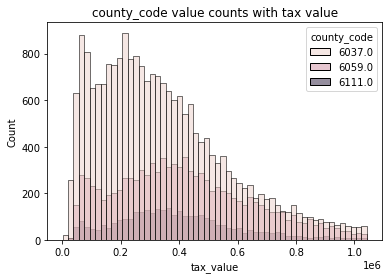

In [87]:
#county_code value counts with tax value
sns.histplot(df, x="tax_value", hue="county_code").set_title('county_code value counts with tax value')
plt.show()

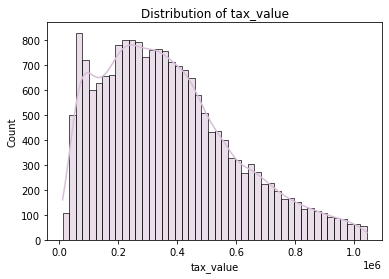

In [88]:
#distribution of tax_value target 
sns.histplot(data=y_train.tax_value, kde = True, color='thistle')
plt.title('Distribution of tax_value')
plt.show()